In [1]:
import pandas
import helpers
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Подход 2: логистическая регрессия

In [2]:
X, y, X_kaggle = helpers.get_clean_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Подбираем оптимальный параметр регуляризации (C)

In [6]:
def plot_C_scores(C_pow_range, scores):
    plt.plot(C_pow_range, scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()

def test_model_C(X, y, C):
    print('C =', str(C))
    model = LogisticRegression(C=C, random_state=42, n_jobs=-1)
    return cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    
def test_model(X, y):
    scores = []
    C_pow_range = range(-5, 6)
    C_range = [10.0 ** i for i in C_pow_range]
    for C in C_range:
        start_time = datetime.datetime.now()
        model_scores = test_model_C(X, y, C)
        print(model_scores)
        print('Time elapsed:', datetime.datetime.now() - start_time)      
        scores.append(np.mean(model_scores))

    plot_C_scores(C_pow_range, scores)
    
    max_score = max(scores)
    max_score_index = scores.index(max_score)
    return C_range[max_score_index], max_score
    

C = 1e-05
[0.6931532  0.69481539 0.69571379 0.69513159 0.69699445]
Time elapsed: 0:00:02.981910
C = 0.0001
[0.70956686 0.71039474 0.71170336 0.71176082 0.71336295]
Time elapsed: 0:00:02.697788
C = 0.001
[0.71449541 0.71577214 0.71625974 0.71697301 0.71831738]
Time elapsed: 0:00:04.561338
C = 0.01
[0.71464598 0.71617915 0.71624749 0.71735041 0.71832832]
Time elapsed: 0:00:05.397845
C = 0.1
[0.71462192 0.71617479 0.71619187 0.71737596 0.7182712 ]
Time elapsed: 0:00:06.017849
C = 1.0
[0.71461815 0.71617185 0.71618338 0.7173762  0.71826341]
Time elapsed: 0:00:06.070063
C = 10.0
[0.71461695 0.71617179 0.71618281 0.71737669 0.7182632 ]
Time elapsed: 0:00:06.088055
C = 100.0
[0.71461692 0.71617206 0.71618249 0.71737655 0.71826345]
Time elapsed: 0:00:06.083327
C = 1000.0
[0.71461693 0.71617214 0.7161825  0.71737659 0.71826346]
Time elapsed: 0:00:06.071695
C = 10000.0
[0.71461693 0.71617215 0.71618251 0.7173766  0.71826345]
Time elapsed: 0:00:06.014223
C = 100000.0
[0.71461693 0.71617215 0.7161

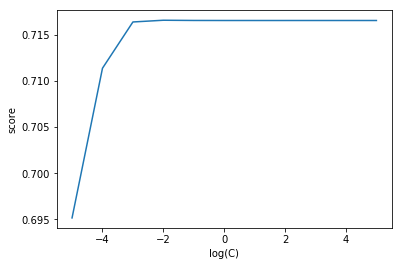

In [7]:
C, score = test_model(X, y)

In [8]:
print(C)
print(score)

0.01
0.716550269725914


Наилучшее значение показателя AUC-ROC достигается при C = 0.01 и равно 0.71. Это сравнимо с градиентным бустингом по 250 деревьям, при этом логистическая регрессия работает заметно быстрее.

# Удаление категориальных признаков

In [10]:
X, y, X_kaggle = helpers.get_clean_data('clean_category')
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


C = 1e-05
[0.69301063 0.69476367 0.69562225 0.69507488 0.69702952]
Time elapsed: 0:00:01.750011
C = 0.0001
[0.70936502 0.71042199 0.71168956 0.71168269 0.71353648]
Time elapsed: 0:00:02.374256
C = 0.001
[0.71434804 0.71581532 0.71629769 0.7168852  0.71853275]
Time elapsed: 0:00:04.169104
C = 0.01
[0.71450425 0.71622052 0.71627999 0.71725088 0.71854131]
Time elapsed: 0:00:04.993551
C = 0.1
[0.71448206 0.71620992 0.71622569 0.71726917 0.71848436]
Time elapsed: 0:00:05.710016
C = 1.0
[0.71447768 0.71620627 0.7162209  0.71727019 0.71847678]
Time elapsed: 0:00:05.595469
C = 10.0
[0.71447669 0.71620645 0.71621968 0.71727123 0.71847581]
Time elapsed: 0:00:05.600736
C = 100.0
[0.7144767  0.71620624 0.71621963 0.71727119 0.71847569]
Time elapsed: 0:00:05.657997
C = 1000.0
[0.71447667 0.71620624 0.71621965 0.71727119 0.71847569]
Time elapsed: 0:00:05.705528
C = 10000.0
[0.71447668 0.71620627 0.71621961 0.71727117 0.71847569]
Time elapsed: 0:00:05.668546
C = 100000.0
[0.71447668 0.71620627 0.7162

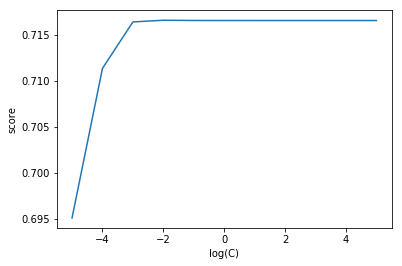

In [11]:
C, score = test_model(X, y)

In [12]:
print(C)
print(score)

0.01
0.7165593885630225


Удаление категориальных признаков не повлияло на качество предсказания. Наилучшее значение показателя AUC-ROC так же достигается при C = 0.01 и равно 0.71. Получается, что в предыдущей модели эти признаки никак не влияли на результат предсказания, модель смогла распознать этот шум.

# "Мешок слов" для кодирования информации о героях.

In [13]:
X, y, X_kaggle = helpers.get_clean_data('clean_category')
X_hero, _y, X_kaggle_hero = helpers.get_clean_data('hero_bag')

scaler = StandardScaler()
X = pandas.DataFrame(scaler.fit_transform(X), index = X.index)
X_kaggle = pandas.DataFrame(scaler.transform(X_kaggle), index = X_kaggle.index)

X = pandas.concat([X, X_hero], axis=1)
X_kaggle = pandas.concat([X_kaggle, X_kaggle_hero], axis=1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


C = 1e-05
[0.69720207 0.69884021 0.69957686 0.69934071 0.70112123]
Time elapsed: 0:00:02.515235
C = 0.0001
[0.72359118 0.72409682 0.72469067 0.72599494 0.72698389]
Time elapsed: 0:00:02.984840
C = 0.001
[0.74465332 0.74667772 0.74413152 0.74880233 0.74740586]
Time elapsed: 0:00:05.307588
C = 0.01
[0.7494741  0.75279102 0.7492512  0.75538896 0.7517834 ]
Time elapsed: 0:00:08.441494
C = 0.1
[0.74943227 0.75315633 0.74950665 0.75598193 0.75166068]
Time elapsed: 0:00:11.028650
C = 1.0
[0.74936294 0.75316855 0.74949769 0.75602057 0.75158694]
Time elapsed: 0:00:11.772526
C = 10.0
[0.74935123 0.75317116 0.74949885 0.75602554 0.75157988]
Time elapsed: 0:00:11.655883
C = 100.0
[0.74935014 0.75317038 0.74949871 0.7560252  0.75157873]
Time elapsed: 0:00:11.647797
C = 1000.0
[0.7493505  0.7531706  0.74949882 0.7560253  0.75157883]
Time elapsed: 0:00:11.660835
C = 10000.0
[0.7493498  0.75317079 0.74949888 0.7560252  0.75157863]
Time elapsed: 0:00:11.729963
C = 100000.0
[0.74935035 0.75317043 0.7494

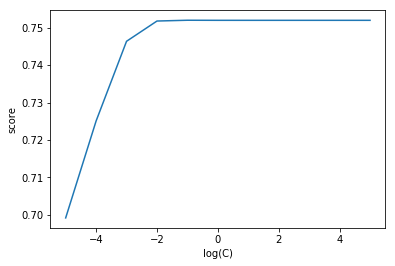

In [14]:
C, score = test_model(X, y)

In [15]:
print(C)
print(score)

0.1
0.7519475726821534


После добавления "мешка слов" по героям качество заметно улучшилось. Наилучшее значение показателя AUC-ROC  достигается при C = 0.1 и равно 0.75. Это объясняется тем, что вместо отсутствия данных о героях или случайного шума из id мы имеем осмысленную разреженную матрицу для построения предсказания.

# Отправляем решение на Kaggle в соревнование: Dota 2: Win Probability Prediction.

Отправим самую лучшую на данный момент модель на соревнование, и посмотрим насколько верной оказалась оценка.

In [19]:
model = LogisticRegression(C=0.1, random_state=42, n_jobs=-1, solver='lbfgs')
model.fit(X, y)
helpers.kaggle_save('lg_hero_bag', model, X_kaggle)